<a href="https://colab.research.google.com/github/painterV/some_coding/blob/main/pagerank_impl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

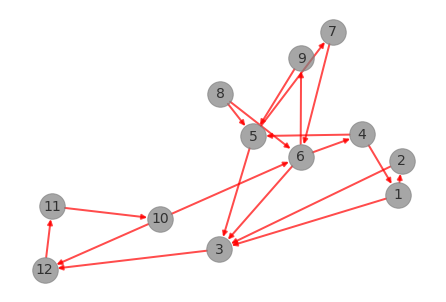

In [30]:
# !pip3 uninstall scipy
# !pip3 install 'scipy<1.8'
# !pip3 uninstall networkx
# !pip3 install 'networkx<2.7'

import networkx as nx               #载入networkx包
import matplotlib.pyplot as plt     #用于画图
G = nx.DiGraph()   #创建空的有向图
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])   # 添加节点 1-12
G.add_edges_from([(1,2),(1,3),(2,3),(3,12),(4,1),(4,5),(5,3), (5,7),(6,3),(6,4),(6,9),(7,6),(8,6),(8,5), (9,5),(10,6),(10,12),(11,10),(12,11)])   
# 添加多条连边，起点为“x”，终点为“y”
nx.draw(G, pos=nx.spring_layout(G), node_color = 'gray',node_size =650, alpha=0.7,edge_color = 'r', with_labels = True, font_size =14, width=2) # 修饰一下要画的图,包括节点颜色、节点大小、节点颜色透明度、边颜色、节点上标签字大小

In [31]:
def pagerank(G, max_iteration=100, d=0.85):
    '''
    pr计算公式： pr(A) = (1-d)/N + d * (pr(B)/out_degree(B) + pr(C)/out_degree(C) + pr(D)/out_degree(D)) 其中B,C,D到A有有向边
    '''
    #初始化每个节点的pr值为 1/n，n是节点数
    nodes = list(G.nodes) #获取图的所有节点
    pr_dict = {} #初始化dict存储每个node对应的pr值
    for nd in nodes:
        pr_dict[nd] = 1.0 / len(nodes) #初始化每个节点的pr值为 1/n
    
    old_pr_dict = pr_dict #dict变量，用来存储 当前迭代的pr值
    new_pr_dict = {} #dict变量，用来存储每一轮迭代更新后的pr值
    in_dict = {} #dict变量，用来存储节点的入边的节点集
    out_dict = {} #dict变量，用来存储节点的出边的节点集
    
    for nd in nodes: # for循环处理每个节点
        from_nodes = G.neighbors(nd) #获取当前节点的邻居（出边的邻居）
        if nd not in out_dict:
            out_dict[nd] = set() #先初始化当前节点的出边的节点集为空集合
        for k in from_nodes:
            out_dict[nd].add(k) #将出边的节点依次加到出边集合中
            if k not in in_dict: 
                in_dict[k] = set() #初始化出边节点的入边的节点集合
            in_dict[k].add(nd) #将当前节点加入到 入边节点集合
    
    #下面是pr值计算的迭代过程：首先要循环更新pr dict，循环次数为函数的参数 max_iteration
    for iter in range(max_iteration):
        for nd in nodes:
            #对每一个图中的节点的pr值进行更新
            if nd not in in_dict:
                #如果当前待更新节点没有入边，则刷新其pr值为 (1-d) / N 其中N是节点总数
                new_pr_dict[nd] = (1-d) / len(nodes)
                continue
            
            #获取所有入边节点
            in_nodes = in_dict[nd]
            tmp_pr = 0.0
            for ind in in_nodes:
                #根据更新公式累加其他节点的pr值除以其他节点的出度
                tmp_pr += old_pr_dict[ind] / len(out_dict[ind])
            
            #根据公式计算当前迭代最终的pr值
            new_pr_dict[nd] = (1-d)/len(nodes) + d* tmp_pr
        #更新 old_pr_dict 用于下一轮迭代计算
        old_pr_dict = new_pr_dict

    #对各结点根据pr值由大到小排序
    new_pr_dict = sorted(new_pr_dict.items(), key=lambda x: x[1], reverse=True)
    #返回各节点pr值 dict

    return new_pr_dict

#计算pr值
pr_dic = nx.pagerank(G)
#对各结点根据pr值由大到小排序
s = sorted(pr_dic.items(), key=lambda x: x[1], reverse=True)

#调用并打印 networkx库获取的pagerank dict
print("Networkx pagerank:", s)

#调用并打印自定义函数实现的pagerank 结果，注：这里指定 max_iteration参数为100
custom_pr = pagerank(G, 100)
print("自定义实现的pagerank: ", custom_pr)

pr_dic1 = {} #定义一个dict存储 排序后的networkx计算的pr
pr_dic2 = {} #定义一个dict存储排序后的自定义计算的pr
for item in s:
    (node, pr) = item
    pr_dic1[node] = pr
for item in custom_pr:
    (node, pr) = item
    pr_dic2[node] = pr

#合并两种方法计算的pr
merge_pr = [[node, pr_dic1[node], pr_dic2[node]] for node in pr_dic1]

#打印top 5的节点和pr
print("top5 pr的节点[networkx]", [a[0] for a in s[:5]])
print("top5 pr的节点[自定义]", [a[0] for a in custom_pr[:5]])

Networkx pagerank: [(12, 0.17304613463509966), (11, 0.15958913849707296), (10, 0.14815321661650085), (6, 0.11914115971819006), (3, 0.11480254853024087), (5, 0.07679136541718702), (4, 0.04625646824877283), (9, 0.04625646824877283), (7, 0.04513611183682545), (1, 0.03215962180572901), (2, 0.026167766445608483), (8, 0.0125)]
自定义实现的pagerank:  [(12, 0.17304684097133458), (11, 0.15958981482514992), (10, 0.1481513426008559), (6, 0.1191422590738699), (3, 0.11480296513643623), (5, 0.07679014109027309), (9, 0.046256973404263144), (4, 0.04625697340413575), (7, 0.045135809963366066), (1, 0.032159213696689136), (2, 0.026167665821092884), (8, 0.012500000000000002)]
top5 pr的节点[networkx] [12, 11, 10, 6, 3]
top5 pr的节点[自定义] [12, 11, 10, 6, 3]


In [32]:
import pandas as pd
data = pd.DataFrame(merge_pr, index =[str(item[0]) for item in merge_pr],
                                              columns =['节点编号', '方法一PR值', '方法二PR值'])
data

,节点编号,方法一PR值,方法二PR值
12,12,0.173046,0.173047
11,11,0.159589,0.159590
10,10,0.148153,0.148151
6,6,0.119141,0.119142
3,3,0.114803,0.114803
5,5,0.076791,0.076790
4,4,0.046256,0.046257
9,9,0.046256,0.046257
7,7,0.045136,0.045136
1,1,0.032160,0.032159


无向图 pagerank: [(6, 0.14890963621096018), (5, 0.12572587991077486), (3, 0.12459871768860116), (12, 0.08189217827071284), (10, 0.08182562526377413), (1, 0.0795325280960456), (4, 0.07750399834463198), (11, 0.058886672341441126), (2, 0.0562159635493992), (7, 0.05496960010788622), (8, 0.05496960010788622), (9, 0.05496960010788622)]
top5 pr的节点[无向图/networkx] [6, 5, 3, 12, 10]
top5 pr的节点[无向图/自定义] [6, 5, 3, 12, 10]


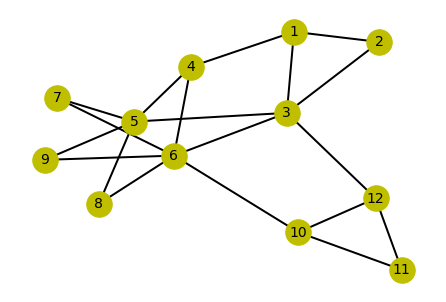

In [33]:
import networkx as nx               #载入networkx包
import matplotlib.pyplot as plt     #用于画图
G = nx.Graph() #创建空的无向图
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])   # 添加节点 1-12
G.add_edges_from([(1,2),(1,3),(2,3),(3,12),(4,1),(4,5),(5,3), (5,7),(6,3),(6,4),(6,9),(7,6),(8,6),(8,5), (9,5),(10,6),(10,12),(11,10),(12,11)])   
# 添加多条连边，起点为“x”，终点为“y”
nx.draw(G, pos=nx.spring_layout(G), node_color = 'y',node_size =650, alpha=1,edge_color = 'black', with_labels = True, font_size =14, width=2)
# 修饰一下要画的图,包括节点颜色、节点大小、节点颜色透明度、边颜色、节点上标签字大小

#计算pr值
pr_dic = nx.pagerank(G)
#对各结点根据pr值由大到小排序
pr2 = sorted(pr_dic.items(), key=lambda x: x[1], reverse=True)
custom_pr2 = pagerank(G, 100)
#调用并打印 networkx库获取的pagerank dict
print("无向图 pagerank:", pr2)
print("top5 pr的节点[无向图/networkx]", [a[0] for a in pr2[:5]])
print("top5 pr的节点[无向图/自定义]", [a[0] for a in custom_pr2[:5]])